## Was Einstein Right? Resolving the EPR Paradox with a quantum circuit 

Welcome to the code tutorial for the “Einstein-Podolsky-Rosen paradox” installment of the Paradoxes series on the Qiskit YouTube channel. In this tutorial, we’ll resolve the EPR paradox without any "spooky-action-at-a-distance" between entangled particles. You'll learn how to track the local flow of information in the thought experiment, how this is fully consistent with Bell's theorem, and why this is crucial for solving one of the biggest open problems in fundamental science: reconciling quantum theory with gravity.

To do this, we'll  simplify the original thought experiment into a quantum circuit that we can simulate with Qiskit!

If you haven't already, I recommend you first watch [our video](https://youtu.be/eoPX4WJlOM8) on the Qiskit YouTube channel, which explains the context of the thought experiment and provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. I also suggest reading the blog post (link coming soon) for a deeper look at the background of the thought experiment.

Let's summarize the thought experiment, simulating each step using Qiskit code:

In 1935, Albert Einstein, Boris Podolsky and Nathan Rosen proposed a paradox. They said that when you have two entangled quantum systems, quantum theory implies that measuring one of the systems has an instantaneous effect on the other system, however far apart they are. This "spooky action at a distance" violates Eintein's principle of locality, hence Einstein, Podolsky and Rosen concluded that quantum mechanics must be an incomplete theory. 

### The EPR thought experiment as a quantum circuit  

Einstein's principle of locality says that, for any two systems A and B, "the real factual situation of system A is independent of what is done with the system B, which is spatially separated from the former." 

This statement does more than just rule out faster-than-light communication - it is a stronger constraint on the laws of physics, which requires that individual systems contain a complete mathematical description of the properties of those systems.

Einstein's principle of locality is contradicted by many explanations of entanglement, which often say something along the lines of: "if two quantum systems are entangled, then measuring one system can instantaneously affect the other system, even if it is on the opposite side of the universe". Even with the caveat that this instantaneous connection cannot enable faster-than-light communication, it still violates Einstein's principle of locality. 

This kind of statement is typically backed up using Bell's theorem, which was proposed by the scientist John Bell to show that the paradox cannot be resolved by using a certain class of local theories called local hidden variable theories. 

However, this doesn't mean that there has to be instantaneous effects between entangled qubits. We can, in fact, save Einstein's principle of locality! 

Here is a quantum circuit for the standard EPR-thought experiment set-up:

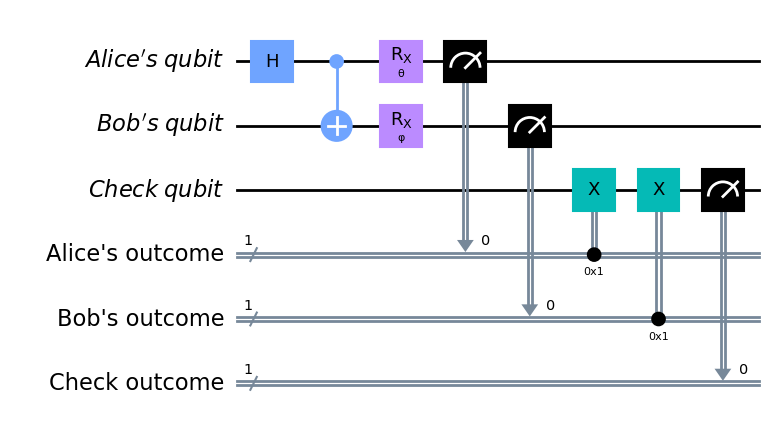

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
qr_Alice_qubit = QuantumRegister(1, 'Alice\'s qubit')
qr_Bob_qubit = QuantumRegister(1, 'Bob\'s qubit')
cr_Alice_outcome = ClassicalRegister(1, 'Alice\'s outcome')
cr_Bob_outcome = ClassicalRegister(1, 'Bob\'s outcome')
qr_Check_qubit = QuantumRegister(1, 'Check qubit')
cr_Check_outcome = ClassicalRegister(1, 'Check outcome')
theta = Parameter('θ')
phi = Parameter('φ')
qc = QuantumCircuit(qr_Alice_qubit, qr_Bob_qubit, qr_Check_qubit, cr_Alice_outcome, cr_Bob_outcome, cr_Check_outcome)
qc.h(qr_Alice_qubit) 
qc.cx(qr_Alice_qubit, qr_Bob_qubit) 
qc.rx(theta, qr_Alice_qubit) 
qc.rx(phi, qr_Bob_qubit)
qc.measure(qr_Alice_qubit, cr_Alice_outcome)
qc.measure(qr_Bob_qubit, cr_Bob_outcome)
qc.x(qr_Check_qubit).c_if(cr_Alice_outcome, 1) 
qc.x(qr_Check_qubit).c_if(cr_Bob_outcome, 1) 
qc.measure(qr_Check_qubit, cr_Check_outcome)

qc.draw("mpl")

Alice and Bob can each choose a basis in which to measure their qubit, which I have captured by adding a paramaterised single-qubit gate before each of their Z-measurements. For simplicity, I have made both these gates be X-rotation gates, with Alice's characterised by θ and Bob's by φ. In general they could both be unitary gates U, where each U is defined by three parameters, and the same explanation will hold. 

I have introduced a "check qubit", which stores the outcome of a parity check on Alice and Bob's measurement outcomes, implemented by a pair of CNOT gates controlled on Alice and Bob's measurement outcomes and targeted on the check qubit. Then if Alice and Bob's measurement outcomes are the same, the check qubit will be in the 0 state, and if Alice and Bob's measurement outcomes are different, it will change to the 1 state.

### Quantum and classical correlations 

The strange thing about measuring maximally entangled qubits is that whatever basis Alice and Bob choose to measure their qubits, if they choose the same basis, their measurement outcomes will be correlated. For example, Z-basis measurements will always give outcomes of 00 or 11, and X-basis measurements, implemented by adding Hadamard gates before the Z-measurements, will always give outcomes of 00 and 11, corresponding to measuring the two qubits to be in the states ++ or -- respectively. 

So even though Alice and Bob are free to choose the basis in which they measure their qubit independently, somehow their measurement outcomes conspire to be the same, making the Check qubit always 0.

Now there are classical systems which have correlations in multiple properties. For example, consider Alice and Bob each having one of a pair of socks. If Alice's sock is red, she knows that Bob's sock is also red. And if Alice's sock is size Small, then she knows Bob's sock is also size Small, so both the size and colour of the socks is fully correlated. 

The difference in the quantum case is that a qubit cannot have a definite state in the X-basis and in the Z-basis simultaneously. This is a version of Heisenberg's uncertainty principle, which says that a particle can't simultaneously have position and momentum. This property is what makes it strange for Alice and Bob's measurement outcomes to be fully correlated, in whichever basis they do their measurements. It seems like Alice's choice of measurement basis has some instantaneous effect on Bob's qubit, since Bob's qubit seems to know what measurement outcome to give so that it will be correlated with Alice's. 

### Bell non-locality 

Bell's theorem is often quoted to support this viewpoint. Bell's theorem considers a class of local theories, called "hidden variable models". In terms of the quantum circuit, the condition of a local hidden variable model is that the distribution of Alice's measurement outcomes is described by a variable which only depends on θ and not φ, whereas Bob's measurement outcomes are described by a variable which only depends on φ and not θ. These assumptions place constraints on Alice and Bob's measurement outcomes, which are violated by quantum mechanics, showing that quantum mechanics cannot be a local-hidden-variable-model. 

The type of locality ruled out by ruling out this class of local theories is called Bell-non-locality. 

### EPR thought experiment as a unitary quantum circuit 

However, Bell's theorem only rules out one class of local models for quantum theory. To explain the alternative local formulation, we need to consider an alternative quantum circuit: 

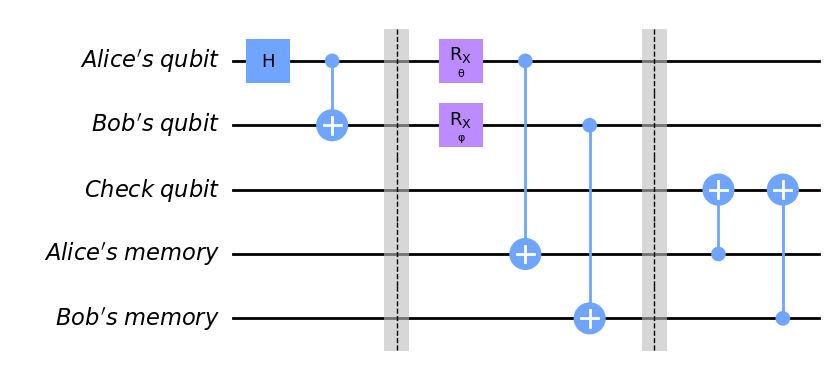

In [2]:
qr_Alice_memory = QuantumRegister(1, 'Alice\'s memory')
qr_Check_qubit = QuantumRegister(1, 'Check qubit')
qr_Bob_memory = QuantumRegister(1, 'Bob\'s memory')

qc = QuantumCircuit(qr_Alice_qubit, qr_Bob_qubit, qr_Check_qubit, qr_Alice_memory, qr_Bob_memory)

qc.h(qr_Alice_qubit) 
qc.cx(qr_Alice_qubit, qr_Bob_qubit)

qc.barrier()

qc.rx(theta, qr_Alice_qubit) 
qc.rx(phi, qr_Bob_qubit) 
qc.cx(qr_Alice_qubit, qr_Alice_memory) 
qc.cx(qr_Bob_qubit, qr_Bob_memory) 

qc.barrier()

qc.cx(qr_Alice_memory, qr_Check_qubit) 
qc.cx(qr_Bob_memory, qr_Check_qubit)

qc.draw("mpl")

This is identical to the previous quantum circuit, except we have changed the classical registers of Alice and Bob's measurement outcomes to quantum registers. Then Alice and Bob's measurement operations become CNOT gates, such that if the control is 0, the memory will stay in the 0 state, and if the control is 1, the memory will be flipped to the 1 state, such that each memory qubit stores the outcome of measuring the entangled qubit. 

As mentioned in previous videos, switching measurements for CNOT gates at the end of a circuit makes no difference to the final distribution of measurement outcomes, which is known as the principle of deferred measurement in quantum computing. However, a key difference to the Bell-type approach is that here we do not assume that Alice and Bob have single probabilistic measurement outcomes. Our overall description of events here is unitary, maintaining the overall entangled superposition of the multiple measurement outcomes that Alice and Bob could retrieve, **freeing it from the assumptions of Bell's theorem**. 

### Local and complete information from observables

Now to get a local account of this thought experiment, we need to shift from the usual description of quantum states using a global statevector to an explicitly local description of quantum states using observables. The global statevector description of states is called the Schrödinger picture, while describing quantum states using observables is called the Heisenberg picture. These two pictures are mathematically equivalent in the sense that they give the same predictions about the distributions of measurement outcomes in quantum mechanics, but only the Heisenberg picture makes the local formulation of quantum mechanics explicit. 

To understand the difference between the global statevector and observables, consider the expression for the expectation value of an observable O after applying some unitary gates U to an initial state |0⟩: 

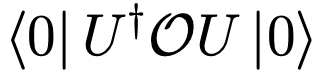

The operator "O" could be e.g. the Pauli X operator, if we want to find the average outcome of doing X-measurements, or the Pauli Z-operator, if we want to find the average outcome of doing Z-measurements.  

In the Schrödinger picture, we would first find the global statevector U|0⟩, and then sandwich the operator between the bra- and ket- to work out the expectation value:

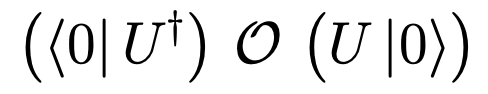

In the Heisenberg picture, we first evolve the operator using the unitary U and U$^\dagger$, and then sandwich this between the bra- and ket- of the initial statevector:

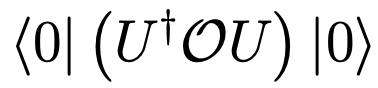

The final expressions are the same. 

The properties of an individual quantum system can be fully described by the observables of that system. The observables give us *local* and *complete* information about a quantum state. If we know the observables of two individual qubits, then we can recover the observables of their combined system, even if they are entangled. For example, if we know the observables of entangled qubits A and B individually, we can recover their overall statevector. 

Now there's an important property of quantum gates applied to observables, that explicitly ensures locality in the Heisenberg picture: 

**Applying quantum operations to a quantum system can only affect the observables of that quantum system. It cannot affect the observables of a quantum system on which the operation is not being directly applied.**

### Tracking information flow in the EPR thought experiment 

Now let's apply this result to the quantum circuit for the EPR thought experiment: 

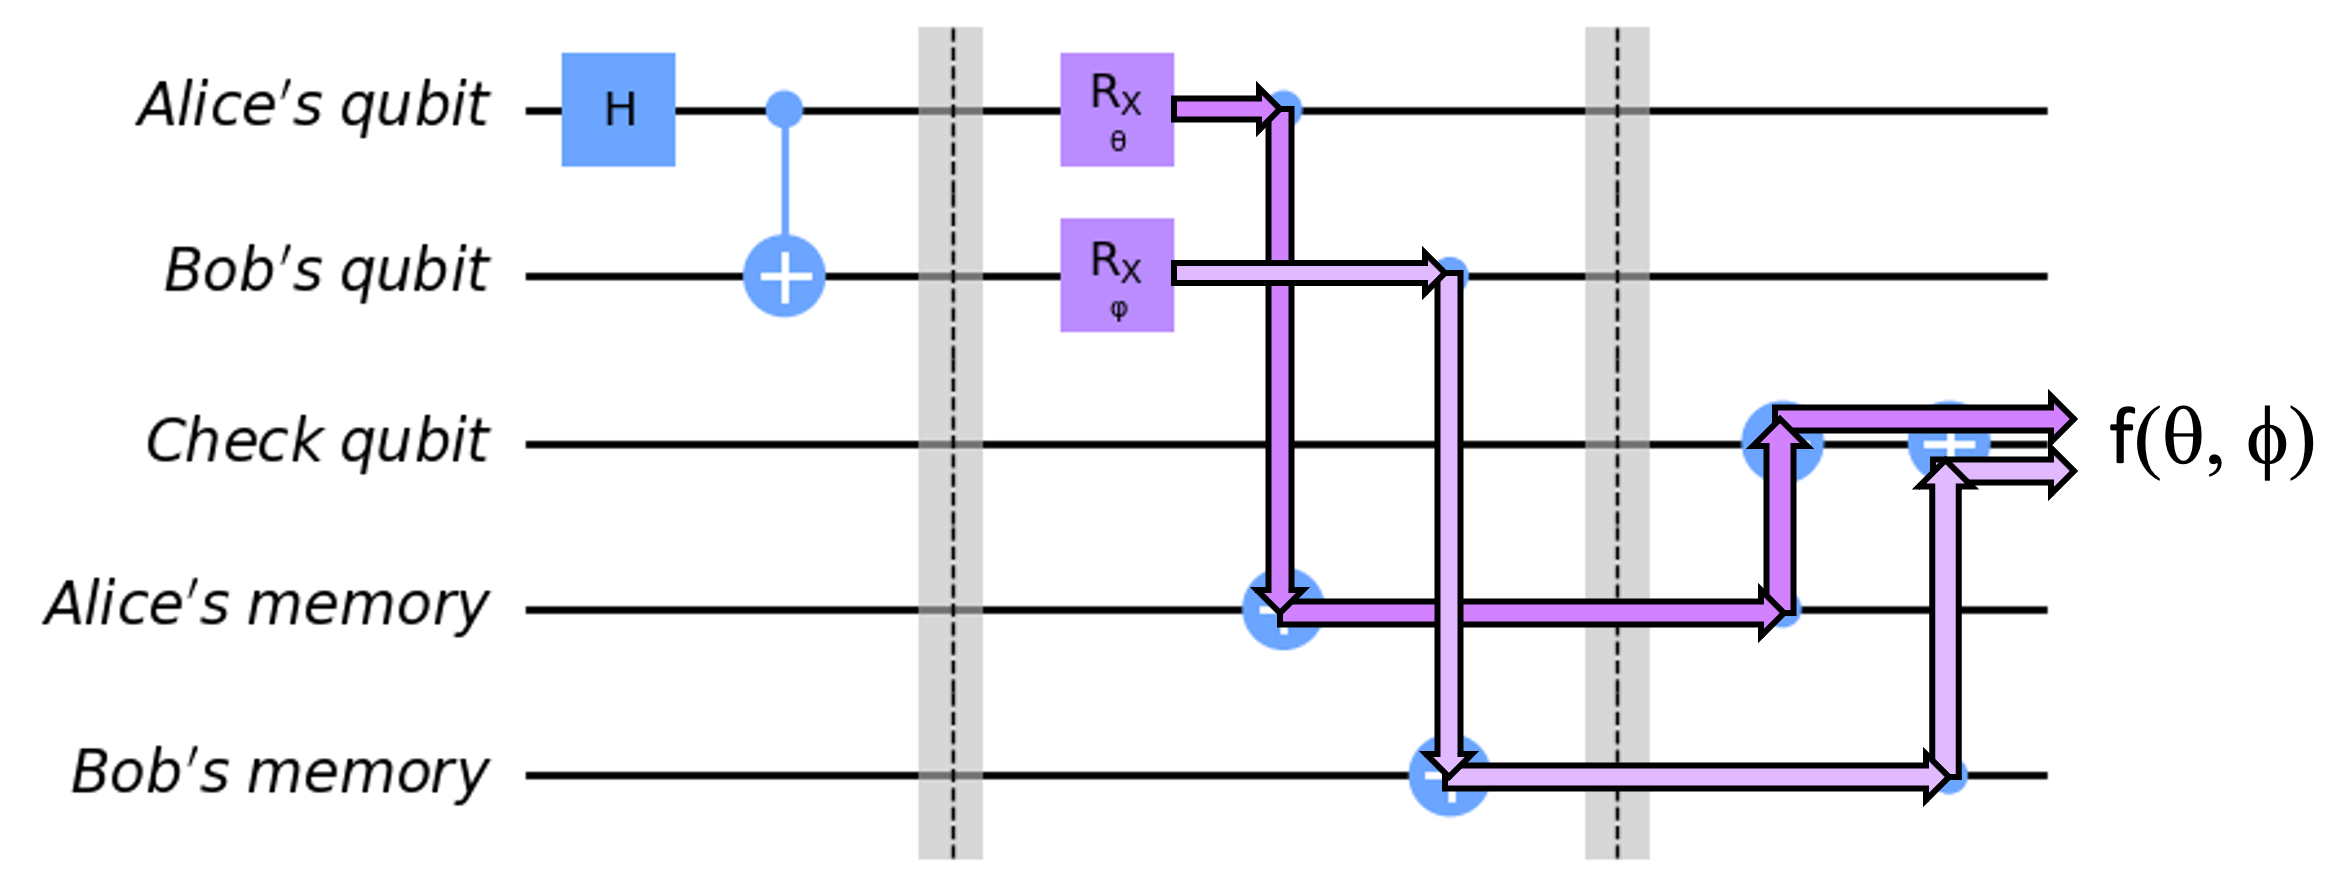

There is a direct quantum operation between Alice's qubit and Alice's memory, which means that the observables describing Alice's memory qubit can depend on the paramater θ. Similarly, the observables describing Bob's memory qubit can depend on the parameter φ. 

Next we have the two CNOT gates that implement the parity check with the Check qubit. One of them acts directly between Alice's memory qubit and the check qubit, so the check qubit's observables can depend on θ. The other acts directly between Bob's memory qubit and check qubit, so the check qubit's observables can also depend on φ.

Therefore the final outcome of the check qubit, which reveals whether or not Alice and Bob's qubits are correlated, can depend on Alice and Bobs' individual, independent choices of measurement basis. We can explain this dependence in a fully local way, tracking the flow of information about which bases Alice and Bob chose to measure their qubits in all the way through the circuit, step by step. 

### Importance of local formulation

The fully local formulation of quantum theory is not just a neat way to track the flow of quantum information - it is also important for the broad goal of reconciling quantum theory with gravity, which is one of the biggest problems in fundamental physics. Our best theory of gravity is given by general relativity, which is local in the sense Einstein described. We don't yet have a good theory that combines quantum mechanics with general relativity, but having a local formulation of quantum theory is one important step towards finding a way to reconcile the two theories.

### More hidden, more robust to decoherence 

Now even though quantum entanglement can be explained without needing "spooky action at a distance", it still has strange consequences. 

When Alice and Bob's qubits are fully entangled, the value of the parameter θ is localised on Alice's qubit. However, θ cannot be accessed by measurements on Alice's qubit alone, even if we had infinite copies of Alice's qubit. 

The value of θ is therefore locked-up in Alice's qubit - this is called locally inaccessible information. Bob's entangled qubit acts as a "key" to unlock the locked-up information stored in Alice's entangled qubit. Similarly, Alice's qubit acts as a "key" to unlock information about the parameter φ that is localised in Bob's qubit. 

Recall also that the parameters θ and φ are different to Bell's "local hidden variables", because they are fundamentally quantum parameters that can only exist in a fully quantum system; they are not parameters that appear in a classical measurement distribution, which is the case in a standard Bell-type analysis of the EPR paradox. 

A cool aspect of locally inaccessible information is that since it is not retrievable by measurements, it also can't be destroyed by measurements! So this information is robust to decoherence. Alice's qubit can be measured in the Z-basis again and again and again, and still retain the locked-up information about θ, which is why we can describe her measurement perfectly well using classical registers in the original quantum circuit. This robustness to decoherence turns out to be the key to understanding how information really gets from one place to another in the quantum teleportation protocol. 

In the next installment, we'll use the local formulation of quantum theory and quantum circuits to demystify the remarkable phenomenon of quantum teleportation.

If you want to find out more about the local formulation of quantum theory, I recommend the papers ["Information flow in entangled systems"](https://arxiv.org/pdf/quant-ph/9906007.pdf) by David Deutsch and Patrick Hayden, and ["The ABC of Deutsch-Hayden descriptors"](https://arxiv.org/pdf/2012.11189.pdf) by Charles Bédard. 